# Michell Luiz Costalonga

# Módulo 7 - Pré-processamento de dados

# Exercício 1

Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
# Importando o arquivo
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")

# Configurando o pandas para mostrar todas as colunas do arquivo
pd.set_option('display.max_columns', None)

# Copiando a tabela original
df_or = df.copy()

# Imprimindo as primeiro cinco colunas do arquivo
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


# Exercício 2:

Quais as dimensões do dataframe?

In [3]:
# Determinando as dimensões do dataframe
linhas, colunas = df.shape

print('O arquivo possui %d linhas e %d colunas.' %(linhas, colunas))

O arquivo possui 29170 linhas e 9 colunas.


# Exercício 3:

Qual o tipo das variáveis?

In [4]:
# Verificando os tipos das variáveis.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


In [5]:
# Uma outra opção é usar a função dtypes.
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

# Exercício 4:

Existem variáveis faltantes no dataset? Quais?

In [6]:
# Verificando se existem variáveis faltantes
print('Número dados faltantes por categoria:\n')
df.isnull().sum()

Número dados faltantes por categoria:



idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [7]:
print('Porcentagem dos dados faltantes por categoria:\n')
(df.isnull().sum()/df.shape[0])*100

Porcentagem dos dados faltantes por categoria:



idade                 0.33939
tempo_educacao        0.00000
estado_civil          0.00000
cor                   0.00000
sexo                  0.00000
horas_por_semana      0.00000
salario_anual         0.00000
nome                100.00000
dívida              100.00000
dtype: float64

É possível perceber que 0,34 % das informações sobre a idade estão faltando ou foram omitidas, enquanto as variáveis nome e dívida apresentam 100 % de dados faltantes.

# Exercício 5:

Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [8]:
# Criando df apenas para as categorias "estado_civil", "cor" e "sexo".
# Estado civil
df_ec = pd.DataFrame(df.estado_civil.value_counts())
df_ec['porcentagem'] = pd.DataFrame(round((df.estado_civil.value_counts()/df.shape[0])*100,3))
df_ec.loc['total'] = df_ec.sum(axis=0)

# Cor
df_cor = pd.DataFrame(df.cor.value_counts())
df_cor['porcentagem'] = pd.DataFrame(round((df.cor.value_counts()/df.shape[0])*100,3))
df_cor.loc['total'] = df_cor.sum(axis=0)

# Sexo
df_sexo = pd.DataFrame(df.sexo.value_counts())
df_sexo['porcentagem'] = pd.DataFrame(round((df.sexo.value_counts()/df.shape[0])*100,3))
df_sexo.loc['total'] = df_sexo.sum(axis=0)

In [9]:
# Imprimindo as categorias de "estado_civil"
df_ec

,estado_civil,porcentagem
Married-civ-spouse,13368.0,45.828
Never-married,9579.0,32.839
Divorced,4162.0,14.268
Widowed,902.0,3.092
Separated,883.0,3.027
Married-spouse-absent,253.0,0.867
Married-AF-spouse,23.0,0.079
total,29170.0,100.000


In [10]:
# Imprimindo as categorias de "cor"
df_cor

,cor,porcentagem
White,25621.0,87.833
Black,2832.0,9.709
Amer-Indian-Eskimo,296.0,1.015
Asian-Pac-Islander,292.0,1.001
Other,129.0,0.442
total,29170.0,100.000


In [11]:
# Imprimindo as categorias de "sexo"
df_sexo

,sexo,porcentagem
Male,18181.0,62.328
Female,9052.0,31.032
?,1937.0,6.640
total,29170.0,100.000


**estado_civil**

Poucos dados referentes às seguintes classes: "Widowed", "Separated", "Married-spouse-absent" e "Married-AF-spouse". Os dois últimos poderiam ser somados à classe "Married-civ-spouse", caso não faça diferença com quem esteja casado.

<br>

**cor**

Poucos dados para as categorias "Amer-Indian-Eskimo", "Asian-Pac-Islander" e "Others". Uma opção seria juntar todos ele em "Others", mas ainda assim, teriam pouca representatividade na amostra.

<br>

**sexo**

Vemos uma baixa quantidade de respostas para a categoria "?" e que a mesma representa apenas 6,64 % do total.

# Exercício 6:

Faça um tratamento nas variáveis faltantes.

Para o caso das colunas "nome" e "divida" que apresentam 100 % de dados faltantes, iremos removê-las, enquanto para a idade, preencheremos com a média.

In [12]:
# Como a idade é uma variável numérica, iremos preencher as linhas faltantes com o valor da média das idades.
media_idade = df.idade.mean()
df.idade.fillna(media_idade, inplace=True)

# Para as colunas "nome" e "dívida", iremos removê-las
df.dropna(axis=1, inplace=True)

A nova tabela, após o pré processamento dos dados é mostrada abaixo.

In [13]:
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual
0,39.0,13,Never-married,White,Male,40,<=50K
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K
2,38.0,9,Divorced,White,Male,40,<=50K
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K


# Exercício 7:

Aplique uma transformação "MinMax" na variável  'tempo_educacao'e uma transformação "StandardScaler" na variável 'horas_por_semana'.

In [14]:
# A biblioteca sklearn.preprocessing foi importada no início do documento.
# Dela, usaremos duas funções: MinMaxScaler e StandardScaler

# Aplicando MinMaxScaler em tempo_educacao
mm_scaler = MinMaxScaler()
X = df.tempo_educacao.values.reshape(-1,1)
mm_scaler.fit(X)

ss_scaler = StandardScaler()
Y = df.horas_por_semana.values.reshape(-1,1)
ss_scaler.fit(Y)

# Tabela tempo_educacao
df_tempo = pd.DataFrame(np.c_[X, mm_scaler.transform(X)])
df_tempo.columns = ['tempo_educacao', 'tempo_educacao_MinMax']

# Tabela hora_por_semana
df_hora = pd.DataFrame(np.c_[Y, ss_scaler.transform(Y)])
df_hora.columns = ['hora_por_semana', 'hora_por_semana_S']

In [15]:
# Imprimindo a tabela com os valores da transformação usando MinMax
df_tempo.describe()

,tempo_educacao,tempo_educacao_MinMax
count,29170.000000,29170.000000
mean,10.169455,0.611297
std,2.394966,0.159664
min,1.000000,0.000000
25%,9.000000,0.533333
50%,10.000000,0.600000
75%,12.000000,0.733333
max,16.000000,1.000000


Vemos que o valor da média normalizada é de 0,61 e que o desvio padrão é igual a 0,16. Isso indica que a normalização usando o mínimo e máximo não é indicado para esse caso.

O histograma dos dados pode ser observado abaixo. Vemos que o mesmo apresenta uma leve assimetria.

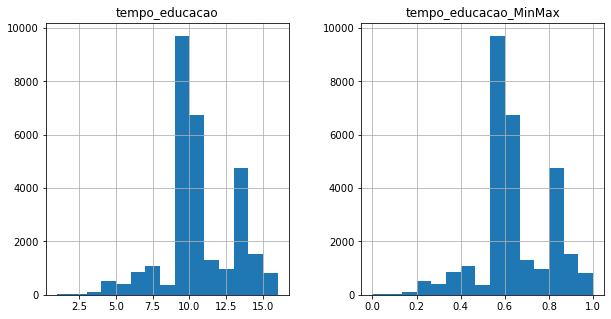

In [16]:
hist1 = df_tempo.hist(bins=15, figsize=(10,5))

Fazendo a mesma análise para "hora_por_semana":

In [17]:
# Imprimindo a tabela com os valores da transformação padrão
df_hora.describe()

,hora_por_semana,hora_por_semana_S
count,29170.000000,2.917000e+04
mean,40.447755,1.914597e-16
std,12.417203,1.000017e+00
min,1.000000,-3.176917e+00
25%,40.000000,-3.605983e-02
50%,40.000000,-3.605983e-02
75%,45.000000,3.666142e-01
max,99.000000,4.715494e+00


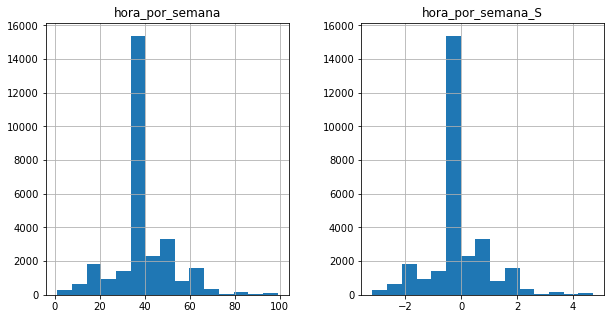

In [18]:
hist2 = df_hora.hist(bins=15, figsize=(10,5))

Já para o caso da variável "hora_por_semana", vemos que a normalização padrão é adequada, uma vez que a média fica em torno de 0 e o desvio padrão próximo de 1.

Refazendo testando a normalização padrão (StandardScaler) para a variável "tempo_educacao":

In [19]:
ss_scaler.fit(X)
df_tempo_ss = pd.DataFrame(np.c_[X, ss_scaler.transform(X)])
df_tempo_ss.columns = ['tempo_educacao', 'tempo_educacao_S']
df_tempo_ss.describe()

,tempo_educacao,tempo_educacao_S
count,29170.000000,2.917000e+04
mean,10.169455,-9.060250e-16
std,2.394966,1.000017e+00
min,1.000000,-3.828702e+00
25%,9.000000,-4.883054e-01
50%,10.000000,-7.075583e-02
75%,12.000000,7.643434e-01
max,16.000000,2.434542e+00


Vemos que a normalização mais adequadada para a variável "tempo_educacao" é a padrão (StandardScaler), pois a média é igual a 0 e o desvio padrão igual a 1.

# Exercício 8:

Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [20]:
# A biblioteca foi importada no início do documento.

ohe = OneHotEncoder()

variavel_ohe = df.estado_civil.values.reshape(-1,1)

ohe.fit(variavel_ohe)

df_estado_civil_ohe = pd.DataFrame(ohe.transform(variavel_ohe).toarray(),
                                   columns = ohe.categories_[0].tolist())

df = pd.concat([df, df_estado_civil_ohe], axis=1)

In [21]:
variavel_ohe = df.cor.values.reshape(-1,1)

ohe.fit(variavel_ohe)

df_cor_ohe = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())

df = pd.concat([df, df_cor_ohe], axis=1)

In [22]:
variavel_ohe = df.sexo.values.reshape(-1,1)

ohe.fit(variavel_ohe)

df_sexo_ohe = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())

df = pd.concat([df, df_sexo_ohe], axis=1)

In [23]:
# Imprimindo dataframe com todas as OHE adicionadas.

df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Female,Male
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


# Exercício 9:

Detecte e elimine os outliers da variável 'idade'.

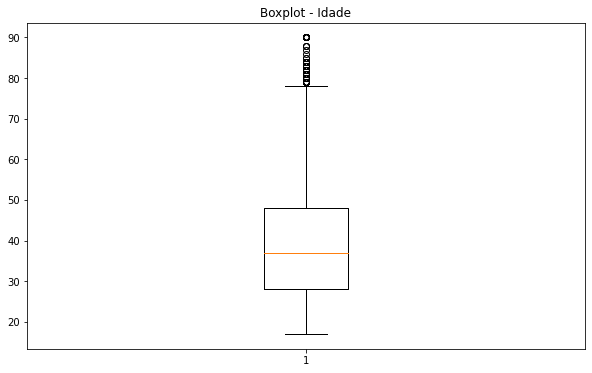

In [24]:
# Fazendo o gráfico box plot para analisar os outliers.
plt.figure(figsize=[10,6])
plt.title('Boxplot - Idade')
plt.boxplot(df.idade)
plt.show()

Observamos uma grande quantidade de outliers. Para retirá-los, devemos calcular o intervalo interquartil, o limite inferior e o limite superior. Depois usaremos um filtro para excluir os valores de idade abaixo ou acima desses valores, respectivamente.

In [25]:
# Interquartil
iqr = np.percentile(df.idade, 75) - np.percentile(df.idade, 25)

# Limite inferior
limite_inf = np.maximum(np.percentile(df.idade, 25) - 1.5 * iqr, np.min(df.idade))

# Limite superior
limite_sup = np.minimum(np.percentile(df.idade, 75) + 1.5 * iqr, np.max(df.idade))

In [26]:
# Criando um dataframe sem os outliers.
df_idade_so = df[(df.idade > limite_inf) & ( df.idade < limite_sup)]
print('O número de linhas antes de remover os outliers da idade era %d. Após a remoção dos outliers, o número de linhas passou a ser %d.' %(df.shape[0], df_idade_so.shape[0]))
num_outliers = df.shape[0] - df_idade_so.shape[0]
print('O número de outliers referente a idade é de %d.' %(num_outliers))

O número de linhas antes de remover os outliers da idade era 29170. Após a remoção dos outliers, o número de linhas passou a ser 28650.
O número de outliers referente a idade é de 520.


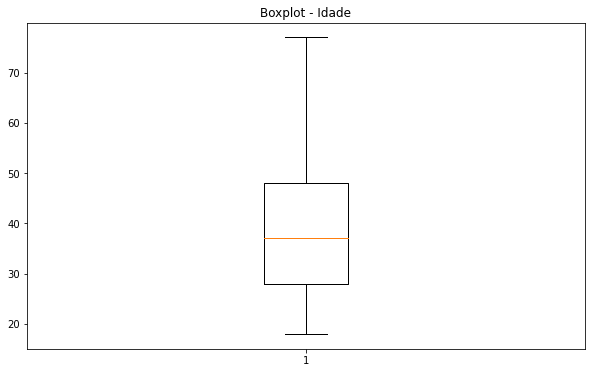

In [27]:
# Plotando novamente o boxplot para comprovar a remoção dos outliers.
plt.figure(figsize=[10,6])
plt.title('Boxplot - Idade')
plt.boxplot(df_idade_so.idade)
plt.show()

Com o gráfico acima, conseguimos confirmar a exclusão dos outliers.

# Exercício 10:

Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

**Observação 1**: Entendi que que a função deveria receber o dataframe, e utilizo o dataframe como parâmetro de entrada na função, e não o nome do arquivo. 

Caso desejássemos usar o nome do arquivo (ou o caminho completo com o nomr do arquivo), o início da função seria substituída por:

string = 'dataframe_exercicio_modulo_7.csv'

**def** transformarDF(string):

    dataframe=pd.read_csv(string)
    .
    .
    .
    return dataframe

Todo o restante seria igual.

**Observação 2**: Como no exercício 8 foi mostrado que o StandardScaler se adequa melhor para a variável tempo_educacao, esse será o método adotado para normalizar as variáveis numéricas.

In [29]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from IPython.display import display

ss_scaler = StandardScaler()
ohe = OneHotEncoder()

df = pd.read_csv('dataframe_exercicio_modulo_7.csv')

def transformarDF(dataframe):
    print('****** INFORMAÇÕES SOBRE A TABELA ORIGINAL ******', end='\n\n')
    
    # Exercício 2: retorna o tamanho do dataframe original
    linhas, colunas = dataframe.shape
    tipo_dados = dataframe.dtypes
    tipo_dados_lista = []
    for item in tipo_dados.values:
        tipo_dados_lista.append(str(item))
    print('O dataframe original possui %d linhas e %d colunas.' %(linhas, colunas), end='\n\n')
  
    # Exercício 3: retorna os tipos de dados
    print('As colunas do dataframe apresentam os seguintes tipos de dados.', end='\n')
    print(tipo_dados, end='\n\n')
    
    # Exercício 4: Verifica a quantidade de dados faltantes:
    dados_faltantes = dataframe.isnull().sum()
    print('Dados faltantes por coluna:', end='\n')
    print(dados_faltantes, end='\n\n')
    print('Total de dados faltantes:', dataframe.isnull().sum().sum(), sep=' ', end='\n\n')
    
    # Exercício 5: Apresenta todas as categorias das variáveis
    i = 0 # Índice da coluna
    columns_num = [] # Lista para armazenar o nome das colunas numéricas
    columns_obj = [] # Lista para armazenar o nome das colunas categóricas
    columns_num_del = [] # Lista para armazenar o nome das colunas numéricas apagadas
    columns_obj_del = [] # Lista para armazenar o nome das colunas categóricas apagadas
    
    for item in tipo_dados_lista:
        if (item == 'float64' or item == 'int64'):
            columns_num.append(dataframe.columns[i])
            i += 1
        else:
            columns_obj.append(dataframe.columns[i])
            i += 1
    
    dict_columns = {} # Dicionário para armazenar o nome da coluna e a porcentagem de dados faltantes (missing values)
    zip_iterator = zip(dataframe.columns.values, (dados_faltantes.values/linhas)*100)
    dict_columns.update(zip_iterator)
    
    for item in dict_columns.keys():
        print('Imprimindo todas as categoridas de %s ' %(item), end='\n')
        df_ = pd.DataFrame(dataframe[item].value_counts())
        df_['porcentagem'] = pd.DataFrame(round((dataframe[item].value_counts()/linhas)*100,3))
        df_.loc['total'] = df_.sum(axis=0)
        display(df_)
        print('\n')
        
    # Exercício 6: Realiza o tratamento dos dos dados faltantes
    print('****** INÍCIO DO PRÉ PROCESSAMENTO ******', end='\n\n')
    
    for item in columns_num:
        if (dict_columns[item] > 80):
            dataframe.drop(item, axis=1, inplace=True)
            columns_num_del.append(item)
        else:
            dataframe[item].fillna(dataframe[item].mean(), inplace=True)
    
    for item in columns_obj:
        if (dict_columns[item] > 80):
            dataframe.drop(item, axis=1, inplace=True)
            columns_obj_del.append(item)
        else:
            dataframe[item].fillna(dataframe[item].value_counts().sort_index(ascending=False).index[0], inplace=True)
    
    dados_faltantes_pos = dataframe.isnull().sum()
    print('Dados faltantes por coluna após o pré processamento:', end='\n')
    print(dados_faltantes_pos, end='\n\n')
    print('Total de dados faltantes após o pré processamento:', dataframe.isnull().sum().sum(), sep=' ', end='\n\n')
    
    if (len(columns_num_del) != 0 or len(columns_obj_del) != 0):
        print('As seguintes colunas foram deletadas:', end='\n')
        if (len(columns_num_del) != 0):
            for item in columns_num_del:
                print(item, end='\n')
        if (len(columns_obj_del) != 0):
            for item in columns_obj_del:
                print(item, end='\n')
                
    # Exercício 7: Aplicar StandardScaler nas variáveis numéricas.
    # Removendo as colunas deletadas das listas de nome das colunas
    if (len(columns_num_del) != 0): # numéricas
        for item in columns_num_del:
            columns_num.remove(item)
    if (len(columns_obj_del) != 0): # objetos
        for item in columns_num_del:
            columns_obj.remove(item)
    
    for item in columns_num:
        X = dataframe[item].values.reshape(-1,1)
        ss_scaler.fit(X)
        dataframe[item + '_SS'] = ss_scaler.transform(X)
        
    # Exercício 8: OHE para as variáveis object
    for item in columns_obj:
        variavel_ohe = dataframe[item].values.reshape(-1,1)
        ohe.fit(variavel_ohe)
        df_ = pd.DataFrame(ohe.transform(variavel_ohe).toarray(), columns = ohe.categories_[0].tolist())
        dataframe = pd.concat([dataframe, df_], axis=1)
        
    # Exercício 9: Removendo outliers baseando-se na idade apenas.
    for item in columns_num:
        if (item == 'idade'):
            # Interquartil
            iqr = np.percentile(dataframe[item], 75) - np.percentile(dataframe[item], 25)

            # Limite inferior
            limite_inf = np.maximum(np.percentile(dataframe[item], 25) - 1.5 * iqr, np.min(dataframe[item]))

            # Limite superior
            limite_sup = np.minimum(np.percentile(dataframe[item], 75) + 1.5 * iqr, np.max(dataframe[item]))
            
            # Removendo os outliers.
            dataframe = dataframe[(dataframe[item] > limite_inf) & ( dataframe[item] < limite_sup)]
            print('\n')
            print('O número de linhas antes de remover os outliers da idade era %d. Após a remoção dos outliers, o número de linhas passou a ser %d.' %(linhas, dataframe.shape[0]), end='\n')
            num_outliers = linhas - dataframe.shape[0]
            print('O número de outliers referente a idade é de %d.' %(num_outliers), end='\n\n')

    print('****** FIM DO PRÉ PROCESSAMENTO ******', end='\n\n')
    
    print('O dataframe pré processado agora possui %d linhas e %d colunas.' %(dataframe.shape[0], dataframe.shape[1]), end='\n\n')
    
    print('****** MOSTRANDO DATAFRAME APÓS O PRÉ PROCESSAMENTO ******', end='\n')
    display(dataframe)
            
    return dataframe
              
df_transformada = transformarDF(df)


****** INFORMAÇÕES SOBRE A TABELA ORIGINAL ******

O dataframe original possui 29170 linhas e 9 colunas.

As colunas do dataframe apresentam os seguintes tipos de dados.
idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

Dados faltantes por coluna:
idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

Total de dados faltantes: 58439

Imprimindo todas as categoridas de idade 


,idade,porcentagem
36.0,798.0,2.736
35.0,786.0,2.695
31.0,781.0,2.677
34.0,780.0,2.674
33.0,771.0,2.643
...,...,...
88.0,3.0,0.010
85.0,2.0,0.007
86.0,1.0,0.003
87.0,1.0,0.003




Imprimindo todas as categoridas de tempo_educacao 


,tempo_educacao,porcentagem
9,9702.0,33.260
10,6740.0,23.106
13,4766.0,16.339
14,1527.0,5.235
11,1289.0,4.419
7,1067.0,3.658
12,982.0,3.366
6,848.0,2.907
15,502.0,1.721
4,499.0,1.711




Imprimindo todas as categoridas de estado_civil 


,estado_civil,porcentagem
Married-civ-spouse,13368.0,45.828
Never-married,9579.0,32.839
Divorced,4162.0,14.268
Widowed,902.0,3.092
Separated,883.0,3.027
Married-spouse-absent,253.0,0.867
Married-AF-spouse,23.0,0.079
total,29170.0,100.000




Imprimindo todas as categoridas de cor 


,cor,porcentagem
White,25621.0,87.833
Black,2832.0,9.709
Amer-Indian-Eskimo,296.0,1.015
Asian-Pac-Islander,292.0,1.001
Other,129.0,0.442
total,29170.0,100.000




Imprimindo todas as categoridas de sexo 


,sexo,porcentagem
Male,18181.0,62.328
Female,9052.0,31.032
?,1937.0,6.640
total,29170.0,100.000




Imprimindo todas as categoridas de horas_por_semana 


,horas_por_semana,porcentagem
40,13418.0,45.999
50,2593.0,8.889
45,1676.0,5.746
60,1332.0,4.566
35,1135.0,3.891
...,...,...
74,1.0,0.003
94,1.0,0.003
82,1.0,0.003
87,1.0,0.003




Imprimindo todas as categoridas de salario_anual 


,salario_anual,porcentagem
<=50K,21999.0,75.417
>50K,7171.0,24.583
total,29170.0,100.000




Imprimindo todas as categoridas de nome 


,nome,porcentagem
total,0.0,0.0




Imprimindo todas as categoridas de dívida 


,dívida,porcentagem
total,0.0,0.0




****** INÍCIO DO PRÉ PROCESSAMENTO ******

Dados faltantes por coluna após o pré processamento:
idade               0
tempo_educacao      0
estado_civil        0
cor                 0
sexo                0
horas_por_semana    0
salario_anual       0
dtype: int64

Total de dados faltantes após o pré processamento: 0

As seguintes colunas foram deletadas:
nome
dívida


O número de linhas antes de remover os outliers da idade era 29170. Após a remoção dos outliers, o número de linhas passou a ser 28650.
O número de outliers referente a idade é de 520.

****** FIM DO PRÉ PROCESSAMENTO ******

O dataframe pré processado agora possui 28650 linhas e 27 colunas.

****** MOSTRANDO DATAFRAME APÓS O PRÉ PROCESSAMENTO ******


,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,idade_SS,tempo_educacao_SS,horas_por_semana_SS,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Female,Male,<=50K,>50K
0,39.0,13,Never-married,White,Male,40,<=50K,0.025255,1.181893,-0.036060,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.828362,1.181893,-2.210500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,38.0,9,Divorced,White,Male,40,<=50K,-0.047755,-0.488305,-0.036060,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,1.047391,-1.323405,-0.036060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,-0.120765,1.599443,-0.036060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,-0.850862,0.764343,-0.197129,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.098265,-0.488305,-0.036060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,1.412440,-0.488305,-0.036060,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
29168,22.0,9,Never-married,White,Male,20,<=50K,-1.215910,-0.488305,-1.646756,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
